## Warmup

In [1]:
# Warmup 1: Based on the code, answer the following questions...

n = 7
while n >= 5:
    print(n)
    n -= 1
    
# How many times is the loop condition evalauated? 4
# How many times is the loop body executed? 3
    

7
6
5


In [2]:
# Warmup 2: Write a function to print out a box of #'s of width by height

# e.g.
# print_box(8, 4) prints
#  ########
#  #      #
#  #      #
#  ########

# These are default arguments!
# What are those?     v           v
def print_box(width = 4, height = 4):
    print('#' * width)
    
    # do something w/ a loop
    num = 0
    while num < height - 2:
        print('#', end='')
        print(' ' * (width - 2), end='')
        print('#', end='')
        print()
        num += 1
    
    print('#' * width)

# Positional Arguments
print_box(8, 4)

# Named Keyword Arguments
print_box(height=6, width=3)

########
#      #
#      #
########
###
# #
# #
# #
# #
###


In [3]:
# Warmup 3: Write a program that takes in exam scores.
#           When the user types in -1, print the average of those scores.
total = 0 # sum
count = 0 # total number of items
curr_num = 0 # last number entered

while curr_num != -1:
    curr_num = int(input("Enter a score [0-100] or -1 to exit: "))
    if (curr_num != -1):
        total += curr_num
        count += 1

print("Avg Score is", total / count)

Enter a score [0-100] or -1 to exit:  20
Enter a score [0-100] or -1 to exit:  100
Enter a score [0-100] or -1 to exit:  -1


Avg Score is 60.0


## Reminder

The structure of a `while` loop is:

```
while CONDITION:
    #body of loop
#lines of code after loop
```

Recall that the CONDITION should evaluate to True or False.  If True then the body of the loop will be executed and control will go back to the CONDITION and repeat.  if False then the body is skipped and the lines of code after loop are executed.

# Iteration 2

## Readings

* [Python for Everybody, 6.4](https://runestone.academy/ns/books/published/py4e-int/iterations/toctree.html)
* [Sweigart Ch 2](https://automatetheboringstuff.com/2e/chapter2/)


## Learning Objectives
After this lecture you will be able to...
- Read and trace through Python code containing nested loops.

- Read and trace through Python code using `break` or `continue` in a while loop

- Determine the effect of `break` and `continue` in nested loops

- Determine how many times a line of code executes
 - inside the body of the loop
 - if the code is the condition of a while loop

## Nested Loops

Like we saw with `if` statements how the body of the `if` statement can contain multiple lines of code, including additional `if` statements, the same is true for `while` loops.  There are some common patterns where having one loop inside of another is a good way to solve the problem.

For example, printing out multiple lines of output is commonly done using nested loops.  The outer loop is used to advance through the multiple lines of output and the inner loop is used to build up the output for a single line.  Take a look at the example below printing out a multiplication table.

Note that the outer loop's control variable, `x`, is which row that is being worked on and printed and the inner loop's control variable, `y`, is which column within that row that is currently being worked on and printed.  A few more things to notice -- after every time the inner loop finishes an empty `print()` is executed to advance to the next line and then the trace returns back to the top of the outer loop where the `y` variable is set back to 1 as the next line is started.

Try changing the numbers in the conditions of the two `while` loops and observe how it changes the output.

In [5]:
# Example 1:  Nested Loops....one loop inside another loop

# print out a multiplication table
x = 1
while x < 10:
    y = 1
    while y < 4:
        print (x * y, "\t", end="")
        y += 1
    print() # adds a newline
    x += 1


1 	2 	3 	
2 	4 	6 	
3 	6 	9 	
4 	8 	12 	
5 	10 	15 	
6 	12 	18 	
7 	14 	21 	
8 	16 	24 	
9 	18 	27 	


### You Try It

Complete the code in the cell below by providing the CONDITIONS of the nested loops.  The code should print out a checkerboard pattern using hashtags:

```
# # # # # # # # 
 # # # # # # # # 
# # # # # # # #
```

Like with the multiplication table above, you can control how many lines and the length of each line.  Here it should be done by modifying the values in the variables `width` and `height`.  The variable `row` is the control variable for the outer loop and `col` is the control variable for the inner loop.

In [6]:
width = 9
height = 3
symbol = '#'
row = 0

while row < height:
    col = 0
    if row % 2 == 1:
        print(" ", end="")
    while col < width:
        print(symbol + ' ', end="")
        col += 1
    print() # adds a newline
    row += 1
             

# # # # # # # # # 
 # # # # # # # # # 
# # # # # # # # # 


##  The `break` statement

The `break` statement in a while loop jumps control to the line after the loop.

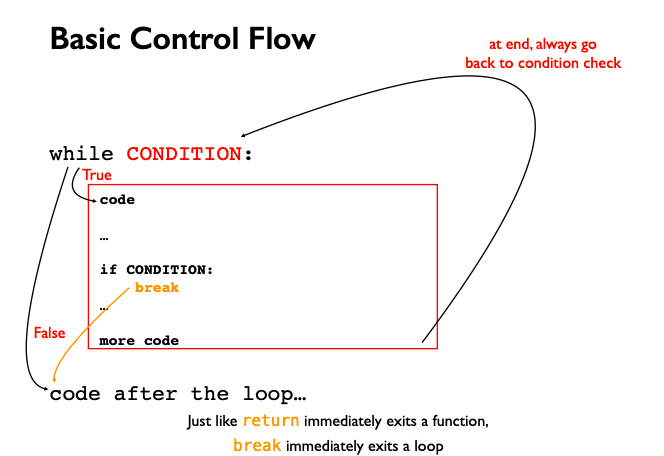

One way to use the `break` statement is as the way to get out of an infinite loop.  Take a look at the example below which finds the next prime number from a user entered starting point.

In [7]:
def is_prime(x):
    """ returns True if x is prime, false otherwise. Assumes x is an int"""
    # first let's make sure it is >1, otherwise return False
    if x <= 1:
        return False

    # Now let's try dividing x by all numbers between 2 and x-1.  As soon as you discover that it is divisible by
    # any of these numbers you know it is not prime so return False
    # if you finish the entire loop and never returned False then it must be prime so return True
    divisor = 2
    while divisor <= x-1:
        if x% divisor == 0:
            return False
        divisor +=1
    return True


# find the next prime number after a user-entered starting point

start = int(input("Enter a starting value for looking for primes:"))

number = start + 1
while True:                                 # NOTE THE USE OF AN INFINITE LOOP
    if is_prime(number):
        print ("the next prime after", start, "is" , number)
        break                               # HERE IS HOW YOU GET OUT OF THE LOOP
    else:
        number += 1


Enter a starting value for looking for primes: 2007


the next prime after 2007 is 2011


### You Try It

The example below is the one letting users enter scores and then printing out the average.  Here we tell the user to enter the string "q" to quit.  Can you finish the code so the loop will exit when the user types a "q" and then calculate and print the average of the entered scores.

In [8]:
# Taking our warmup example, now let the user quit by typing in q

total = 0 # sum
count = 0

while True:
    score = input("Enter a score [0-100] or q to quit: ")
    
    # TODO: If the user types q, quit.
    if score == 'q':
        break
    
    total += float(score)
    count += 1
    print('The average score is', (total / count))

# TODO: At the end, tell the user the average score as well as how many scores were entered.
print("The overall average score is", (total/count))
print("The total number of scores is",count)

Enter a score [0-100] or q to quit:  100


The average score is 100.0


Enter a score [0-100] or q to quit:  90


The average score is 95.0


Enter a score [0-100] or q to quit:  80


The average score is 90.0


Enter a score [0-100] or q to quit:  80


The average score is 87.5


Enter a score [0-100] or q to quit:  q


The overall average score is 87.5
The total number of scores is 4


## The `continue` statement

A `continue` statement in a while loop jumps back to the while condition.

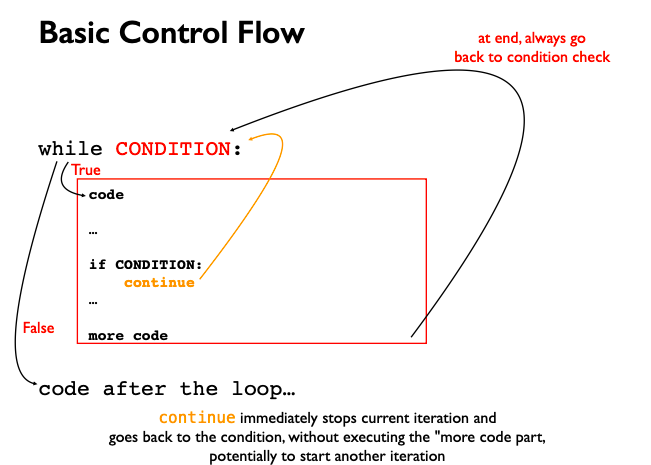

Like the `break` statement the flow of execution is changed but instead of going outside of the loop, control goes back to the top of the loop.  This is useful when you need to start again.  For example, in our getting scores, if a user types in an invalid value, you can print a message and then go back to the top of the loop so they start again.  Take a look at the code below.

In [9]:
# Taking our break example, now check if the user input a valid score [0-100].
# If they did not, re-prompt them to enter a score.

total = 0 # sum
count = 0

while True:
    score = input("Enter a score [0-100] or q to quit: ")
    
    if score == 'q':
        break
    
    score = float(score)
    if score < 0 or score > 100:
        print("Invalid input")
        continue
    
    total += float(score)
    count += 1
    print('The average score is', (total / count))

print('Quitting!')
print('The overall average was ', (total / count)) # BONUS: What could go wrong here?
print(count, 'scores were collected')

Enter a score [0-100] or q to quit:  70


The average score is 70.0


Enter a score [0-100] or q to quit:  80


The average score is 75.0


Enter a score [0-100] or q to quit:  30


The average score is 60.0


Enter a score [0-100] or q to quit:  100


The average score is 70.0


Enter a score [0-100] or q to quit:  -100


Invalid input


Enter a score [0-100] or q to quit:  -100


Invalid input


Enter a score [0-100] or q to quit:  100000


Invalid input


Enter a score [0-100] or q to quit:  999


Invalid input


Enter a score [0-100] or q to quit:  70


The average score is 70.0


Enter a score [0-100] or q to quit:  q


Quitting!
The overall average was  70.0
5 scores were collected


## Using `break` and `continue` within nested loops

When you use `break` and `continue` within nested loops they affect the **inner most loop**.  Look at the silly example below.

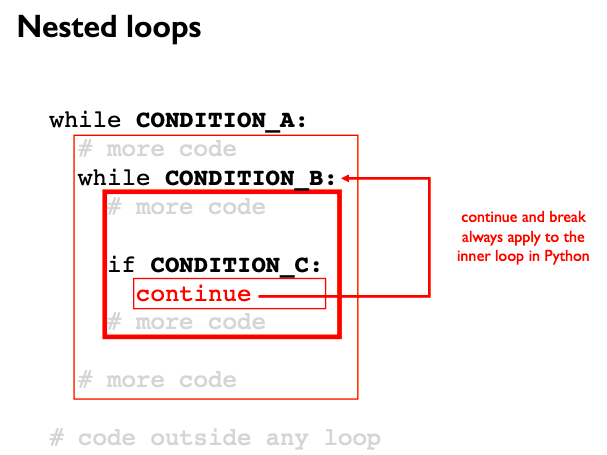

In [10]:
# a silly example
i = 0
while i <= 10:
    j = 0
    print('i:', i)
    while j < i:
        if j % 2 == 0:
            j += 1
            continue
        print('- j:', j)
        j += 1
        
    i += 1

i: 0
i: 1
i: 2
- j: 1
i: 3
- j: 1
i: 4
- j: 1
- j: 3
i: 5
- j: 1
- j: 3
i: 6
- j: 1
- j: 3
- j: 5
i: 7
- j: 1
- j: 3
- j: 5
i: 8
- j: 1
- j: 3
- j: 5
- j: 7
i: 9
- j: 1
- j: 3
- j: 5
- j: 7
i: 10
- j: 1
- j: 3
- j: 5
- j: 7
- j: 9


## Acey-Deucey Game

Here is an application of `break`, `continue`, and nested loops in a game.  Check out the Wikipedia page on the Acey-Deucey Game.

https://en.wikipedia.org/wiki/Acey_Deucey_(card_game)

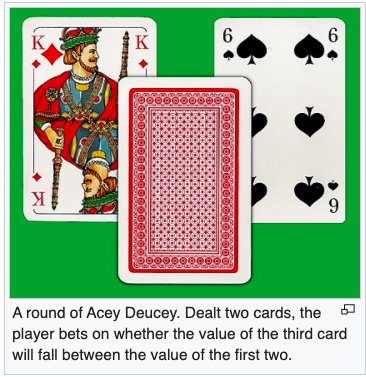

First, try playing the code with the way it is written now.  It works (mostly), but see if you can cheat.  Then you can go through the code and make improvements.

In [12]:
# Acey Deucey Game
# The game works, but has some flaws. Let's improve it using what we just learned!

# Complete the TODOs in numbered order, beginning with TODO #0 and ending with TODO #4 (5 total).
# If you get stuck, go to the next cell for a list of hints.

# TODO #0: Play the game! :) Can you cheat?


import random

chips = 10

num_rounds = 5
current_round = 1

print("Welcome to Acey Deucey!")
print("You have", chips, "chips.")


# TODO #1: Are we actually going to play 5 rounds? Fix this.
while current_round <= num_rounds:
    
    # Draws 2 random cards
    card1 = random.randint(1,13)
    card2 = random.randint(1,13)
    print("Your Cards:", card1,"\t", card2)
    
    # TODO #2: If the dealt cards are the same, re-deal.
    if card1 == card2:
        continue
    
    
    wager = int(input("How much do you want to wager? "))  
    
    # TODO #4: If the user enters a bad wager or does not have enough chips, re-prompt them.
    while wager < 0 or wager > chips:
        print("You can't bet like that!")
        wager = int(input("How much do you want to wager? "))
    
    
    
    mid_card = random.randint(1,13)
    print("The middle card was", mid_card)
    if wager != 0:
        if card1 < mid_card < card2 or card2 < mid_card < card1:
            print('You win', wager, 'chips!')
            chips += wager
        else:
            print('You lose', wager, 'chips!')
            chips -= wager
    else:
        print('You did not wager anything, therefore you did not win or lose!')

    # TODO #3: If you are out of chips, leave the table.
    if chips <= 0:
        break
        
    print("You have", chips, "chips.")
    current_round += 1

print("Thanks for playing!")
print("You left with", chips, "chips.")


Welcome to Acey Deucey!
You have 10 chips.
Your Cards: 8 	 9


How much do you want to wager?  5


The middle card was 3
You lose 5 chips!
You have 5 chips.
Your Cards: 4 	 7


How much do you want to wager?  2


The middle card was 5
You win 2 chips!
You have 7 chips.
Your Cards: 8 	 5


How much do you want to wager?  -3


You can't bet like that!


How much do you want to wager?  7


The middle card was 8
You lose 7 chips!
Thanks for playing!
You left with 0 chips.


### HINTS On Fixes:

Use these suggestions for making fixes and improvements to the code:
* For TODO 0, try betting with negative or an outlandish number of chips.
* For TODO 1, we currently have an off-by-1 error
* For TODO 2, we should use a continue statement
* For TODO 3, we should use a break statement
* For TODO 4, we should use a nested while loop

## Summary

You have learned about nested loops and the use of the `break` and `continue` statements within loops, including the fact that when these statements are used the change the flow of control within the inner most loop.